<a href="https://colab.research.google.com/github/SebastienPaviot/tools/blob/main/load_tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the URL to test: https://smartcamforsocialnetworks.com/
Request 1 completed in 1.1913 seconds
Request 2 completed in 1.1829 seconds
Request 3 completed in 1.1869 seconds
Request 4 completed in 1.1867 seconds
Request 5 completed in 1.2995 seconds
Request 6 completed in 1.4599 seconds
Request 7 completed in 1.4713 seconds
Request 8 completed in 1.4974 seconds
Request 9 completed in 1.5325 seconds
Request 10 completed in 1.5814 seconds
Request 11 completed in 1.0190 seconds
Request 12 completed in 1.0236 seconds
Request 13 completed in 1.0349 seconds
Request 14 completed in 1.0655 seconds
Request 15 completed in 1.1272 seconds
Request 16 completed in 1.1247 seconds
Request 17 completed in 1.1310 seconds
Request 18 completed in 1.1238 seconds
Request 19 completed in 1.1449 seconds
Request 20 completed in 1.1505 seconds
Request 21 completed in 1.1540 seconds
Request 22 completed in 1.1564 seconds
Request 23 completed in 1.1532 seconds
Request 24 completed in 1.1443 seconds
Request 25 

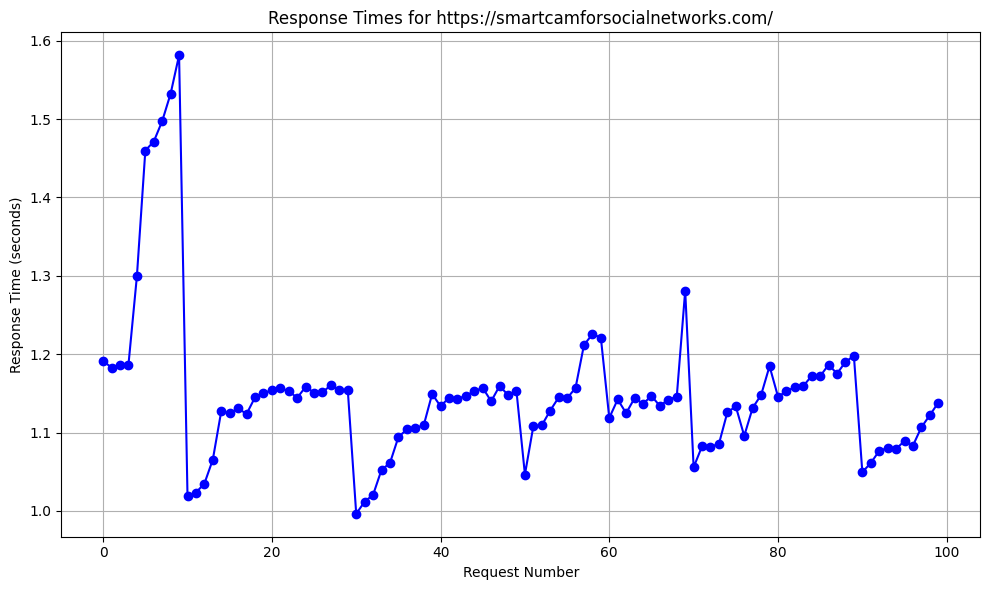

In [4]:
import requests
import time
import random
import concurrent.futures
import matplotlib.pyplot as plt

def fetch_url(url):
    # Generate a timestamp and a random number to avoid cache
    timestamp = int(time.time())
    random_number = random.randint(1000, 9999)

    # Append the timestamp and random number as a query parameter
    full_url = f"{url}?timestamp={timestamp}_{random_number}"

    start_time = time.time()
    try:
        response = requests.get(full_url, timeout=5)  # Timeout to avoid hanging
        response.raise_for_status()  # Raise an exception for bad status codes
        elapsed_time = time.time() - start_time
        return elapsed_time
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
        return None

def main(url):
    response_times = []
    for i in range(10):  # Loop 10 times, sending 10 requests each time
        with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
            futures = [executor.submit(fetch_url, url) for _ in range(10)]
            for future in concurrent.futures.as_completed(futures):
                try:
                    elapsed_time = future.result()
                    if elapsed_time is not None:
                        response_times.append(elapsed_time)
                        print(f"Request {len(response_times)} completed in {elapsed_time:.4f} seconds")
                except Exception as e:
                    print(f"An error occurred: {e}")
        time.sleep(10)  # Pause 10 seconds between each batch

    # Generate graph
    plt.figure(figsize=(10, 6))
    plt.plot(response_times, marker='o', linestyle='-', color='b')
    plt.xlabel("Request Number")
    plt.ylabel("Response Time (seconds)")
    plt.title(f"Response Times for {url}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    target_url = input("Enter the URL to test: ")
    main(target_url)
